<a href="https://colab.research.google.com/github/veronica1013/Datascience_core_module2_week2_IP/blob/main/Moringa_Data_Science_Core_Module2_W2_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors Affecting Housing Pricing

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, working for Hass Consulting Company, a real estate leader with over 25 years of experience, my main aim is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success
A model that will accurately predict the sale of house prices 

#### Significance level
The significance level is set at alpha = 0.05

### c) Understanding the context 


Details of the columns is as listed below:
1. Id 
2. price  - Price of the house
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

### d) Recording the Experimental Design
The experimental design will be as listed below:
1. Loading the data
2. Understanding the data
3. Data Cleaning
4. Perform univariate, bivariate and multivariate analysis
5. Perform regression analysis (Incorporate categorical independent variables into the models)
*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
6. Check for Multicollinearity
7. Provide a recommendation based on the analysis
8. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
9. Challenge the solution by providing insights on how to make improvements in model 

### e) Data Relevance

The data that was used for prediction was obtained from the information on real estate properties that was collected over the past few months.

### 1.1 Importing the libraries

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

The dataset and glossary to use for this project can be found here [link](http://bit.ly/IndependentProjectWeek7Dataset).

In [ ]:
# Loading the data 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
data_df= pd.read_csv(url)


## 3. Checking the Data

In [ ]:
# Preview first rows
data_df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
# Preview last rows
data_df.tail(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Check the shape
data_df.shape

(21613, 20)

In [ ]:
# Ckeck column names
data_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Check the data types
data_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Check if there are any missing values
data_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Check duplicates if any in the dataset
data_df.duplicated().sum()

3

In [ ]:
# Confirm the 3 duplicates
duplicate = data_df[data_df.duplicated()]
duplicate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


It is evident that the data is not similar. Thus decided to keep them.

In [ ]:
# Check for duplicates using the id column
data_df['id'].duplicated().sum()

177

In [ ]:
# Check the index of the duplicates
duplicate_id = data_df['id'][data_df['id'].duplicated()]
duplicate_id

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [ ]:
# Check for duplicates by column id
duplicated_id = data_df[data_df['id'].duplicated()]
duplicated_id

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [ ]:
# Check for duplicates by id and price column
for i in data_df['id']:
  if i == 6021501535:
    print(i)
  

df_duplicates = data_df[data_df.duplicated(subset=['id', 'price'], keep=False)]
df_duplicates

6021501535
6021501535


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


Checking for duplicates by price and id column returns six data points. I will check for exact details of the 177 duplicates by using keep=False for ease of comparison

In [ ]:
# Confirm details of the duplicates
df1_duplicates = data_df[data_df.duplicated(subset=['id'], keep=False)]
df1_duplicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


It's evident that the data points with the duplicate values are of the same house gauginh from the location, sizes, year buit etc but the difference is in their prices. With the price variations, it is difficult to make a decision on which price to keep  so I will drop all the duplicate houses with different prices during data cleaning.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation
Performed a validation with the Hass Consult [Website](https://hassconsult.co.ke/real-estate/hass-index/14-the-hass-sales-index?typ=2&layout=3). More information is found on this [link](https://hassconsult.co.ke/real-estate/images/HassPropertyIndexQ12021.pdf).

## 5. Data Cleaning

### 5.1 Cleaning the Dataset

In [ ]:
# Considering that we will use rank, country full and rank date columns, we will drop the rest 
# as they wont be used.
# The Rank column from the Rankings dataset will be used to merge onto the results dataset
#column_names = ['country_abrv', 'total_points',
       #'previous_points', 'rank_change', 'cur_year_avg',
       #'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       #'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       #'three_year_ago_weighted', 'confederation']

#ranking_df = ranking_data.drop(columns=column_names)
#ranking_df.head(2)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Change the data type for year built and year renovated column from int64 to datetime
data_df["yr_built"] = pd.to_datetime(data_df["yr_built"], format='%Y')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [ ]:
# Can't change the year renovated data type to datetime because of the zero value as years
# Change the datatype to string first
data_df["yr_renovated"] = data_df["yr_renovated"].astype(str)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  object        
 15  zipcode        2161

In [ ]:
# Change the string to four zeros
data_df['yr_renovated']=['000'+x if x=='0' else x for x in data_df['yr_renovated'] ]
data_df['yr_renovated']

0        0000
1        1991
2        0000
3        0000
4        0000
         ... 
21608    0000
21609    0000
21610    0000
21611    0000
21612    0000
Name: yr_renovated, Length: 21613, dtype: object

In [ ]:
# check the number of houses with no year of renovation
# 20,699 houses didn't have year of renovation
# We will keep them and try make a comparison and see if it has any impact on the sales prices
data_df['yr_renovated'].value_counts()


0000    20699
2014       91
2013       37
2003       36
2005       35
        ...  
1954        1
1934        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# change the zero years to nan to enable conversion of year renovated column to datetime
data_df['yr_renovated'] = data_df['yr_renovated'].replace('0000',np.nan)
data_df['yr_renovated']

0         NaN
1        1991
2         NaN
3         NaN
4         NaN
         ... 
21608     NaN
21609     NaN
21610     NaN
21611     NaN
21612     NaN
Name: yr_renovated, Length: 21613, dtype: object

In [ ]:
# change the year renovated column from object to datetime
data_df["yr_renovated"] = pd.to_datetime(data_df["yr_renovated"], format='%Y')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   914 non-null    datetime64[ns]
 15  zipcode        2161

In [ ]:
data_df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,NaT,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639


In [ ]:
# Choosing a Sample size
data = data_df.sample(n=5000, replace="False")
data.shape

(5000, 20)

In [ ]:
# Create a new column to capture the year built for easy sorting of the data by year column
df = data.copy(deep=True)
df["year_built"] = pd.DatetimeIndex(df["yr_built"]).year

# Confirm the changes
df.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
13077,7979900145,385000.0,3,1.00,1470,11398,1.0,0,0,3,8,1470,0,1950-01-01,NaT,98155,47.7460,-122.296,1710,11407,1950
15750,5209200010,485000.0,3,1.50,1870,7853,1.0,0,0,3,7,1300,570,1962-01-01,NaT,98125,47.7045,-122.281,1870,8300,1962
11711,3176600105,750000.0,3,2.25,2250,5301,2.0,0,0,4,8,1510,740,1975-01-01,NaT,98115,47.6741,-122.271,2240,7200,1975


In [ ]:
# Create a new column to capture the year renovated for easy sorting of the data by year column
df['year_renovated'] = pd.DatetimeIndex(df["yr_renovated"]).year

# Confirm the changes
df.head(3)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
2766,1919800260,645000.0,3,1.75,2340,6750,1.5,0,0,5,7,1620,720,1914-01-01,NaT,98103,47.6956,-122.335,1410,3388,1914,NaN
570,5104510270,338900.0,4,2.50,1830,5612,2.0,0,0,3,7,1830,0,2003-01-01,NaT,98038,47.3572,-122.015,1830,5998,2003,NaN
13238,2623039018,685000.0,4,1.00,1550,15239,1.5,1,4,3,6,1370,180,1930-01-01,NaT,98166,47.4502,-122.378,1790,22047,1930,NaN


In [ ]:
# Replace the missing values in year column with zero
df['year_renovated'] = df['year_renovated'].fillna(0)
df['year_renovated']

2766     0.0
570      0.0
13238    0.0
2710     0.0
15437    0.0
        ... 
3862     0.0
6103     0.0
13077    0.0
15750    0.0
11711    0.0
Name: year_renovated, Length: 5000, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2766 to 11711
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5000 non-null   int64         
 1   price           5000 non-null   float64       
 2   bedrooms        5000 non-null   int64         
 3   bathrooms       5000 non-null   float64       
 4   sqft_living     5000 non-null   int64         
 5   sqft_lot        5000 non-null   int64         
 6   floors          5000 non-null   float64       
 7   waterfront      5000 non-null   int64         
 8   view            5000 non-null   int64         
 9   condition       5000 non-null   int64         
 10  grade           5000 non-null   int64         
 11  sqft_above      5000 non-null   int64         
 12  sqft_basement   5000 non-null   int64         
 13  yr_built        5000 non-null   datetime64[ns]
 14  yr_renovated    228 non-null    datetime64[ns]
 15  

In [ ]:
# Drop unneccesary columns 
new_df = df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
2766,1919800260,645000.0,3,1.75,2340,6750,1.5,0,0,5,7,1620,720,98103,47.6956,-122.335,1410,3388,1914,0.0
570,5104510270,338900.0,4,2.50,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0


In [ ]:
# drop all the duplicate values
df.drop_duplicates(subset ="id", keep = False, inplace = True)
df.shape

(3939, 20)

In [ ]:
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
#%matplotlib inline

#lat = df['lat'].values
#lat1 = np.array(list(map(np.float, lat)))

#lon = df['long'].values
#lon1 = np.array(list(map(np.float, lon)))

#plt.figure(figsize=(8, 8))
#m = Basemap(projection='ortho', resolution=None, lat_0=lat1, lon_0=lon1)
#m.bluemarble(scale=0.5);

In [ ]:
#geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

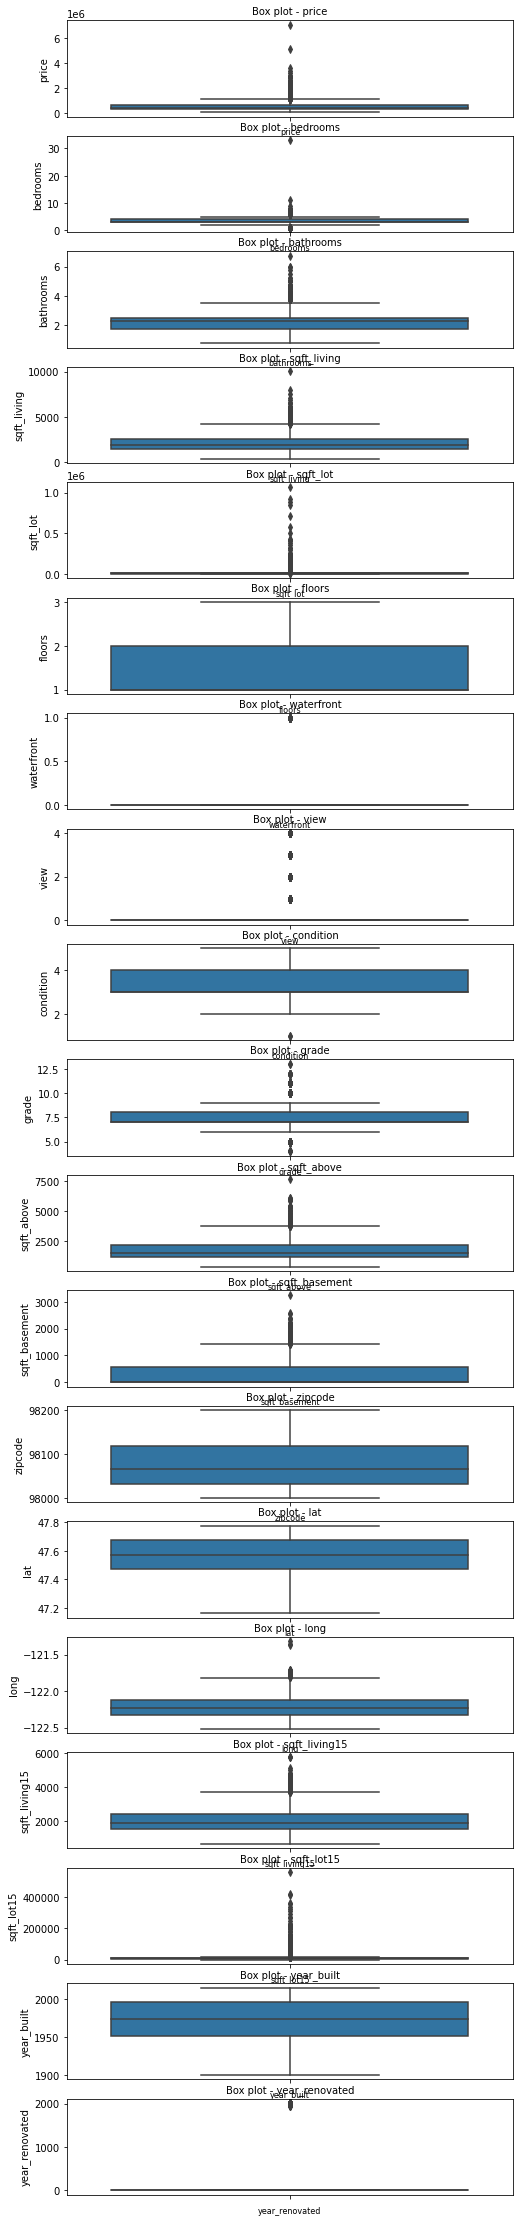

In [ ]:
# Plotting columns with numerical values only to check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# The outliers could be due to the high scores by the teams so we will keep them
# considering they are on home score column and away score
# but to check more on the outliers we will find the minimum and maximum values to see 
# if there's more information on the same

In [ ]:
# checking the anomalies
Quantile_1 = df.quantile(.25)
Quantile_3 = df.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((df < Quantile_1 - 1.5* IQR_values) | (df > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

id                  0
price             222
bedrooms          107
bathrooms          99
sqft_living       107
sqft_lot          422
floors              0
waterfront         27
view              387
condition           2
grade             363
sqft_above         99
sqft_basement      96
zipcode             0
lat                 0
long               44
sqft_living15      89
sqft_lot15        400
year_built          0
year_renovated    183
dtype: int64

Initially we had seen that the year renovated column had 914 entries with years indicated while almost 20,000 entries didn't have any year of renovation indicated. Having 906 entries on year renovated as an anomaly is because majority of the data in that column had zero as year of renovation. We will therefore not drop these anomalies as they are not anomalies per se.

In [ ]:
# Checking the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']]

# Test for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


Statistics=0.253, p=0.000
Sample does not look Guassian.


## 6. Exploratory Analysis

In [ ]:
# Change the bathroom and floors datatype from float to integer 
# Because the number of bathrooms and floors need to be whole numbers
# But first, round off the float values
# Then convert float to integer
df['bathrooms'] = df['bathrooms'].round(0)
df['floors'] = df['floors'].round(0)

In [ ]:
# Convert float values of bathrooms and floors to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [ ]:
df['view'].unique()

array([0, 4, 3, 2, 1])

In [ ]:
df['waterfront'].unique()

array([0, 1])

In [ ]:
df['bathrooms'].unique()

array([2, 1, 3, 4, 5, 6, 7])

In [ ]:
df['floors'].unique()

array([2, 1, 3])

In [ ]:
df['bedrooms'].unique()

array([ 4,  2,  3,  5,  8,  6,  1,  9,  7, 33, 11])

In [ ]:
# Previewing the outliers from the home score column
gkk = df.groupby(['bedrooms'])
gkk.last()
# From previewing the scores, it's confirmed that the teams scored those number of goals.
# Therefore, we will keep the outliers because they are valid

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
bedrooms,,,,,,,,,,,,,,,,,,,
1,859000110,125000.0,1,500,7440,1,0,0,1,5,500,0,98106,47.5252,-122.362,1350,7440,1928,0.0
2,3126049439,313000.0,2,870,747,2,0,0,3,8,800,70,98103,47.6967,-122.342,1710,1280,2004,0.0
3,3176600105,750000.0,2,2250,5301,2,0,0,4,8,1510,740,98115,47.6741,-122.271,2240,7200,1975,0.0
4,9485940290,464950.0,2,2350,36116,1,0,0,4,9,2350,0,98042,47.3533,-122.082,2580,36116,1983,0.0
5,114100131,559950.0,4,2450,8193,2,0,0,3,9,2450,0,98028,47.7721,-122.241,2310,8193,2005,0.0
6,4058800830,612000.0,3,3840,14040,2,0,3,3,8,2460,1380,98178,47.5060,-122.241,2170,6765,1949,0.0
7,7159200005,3200000.0,4,6210,8856,2,0,2,5,11,4760,1450,98109,47.6307,-122.354,2940,5400,1910,0.0
8,6746700615,700000.0,2,2280,3000,2,0,0,3,7,1210,1070,98105,47.6675,-122.316,1610,3000,1911,0.0
9,2902200015,700000.0,3,3680,4400,2,0,0,3,7,2830,850,98102,47.6374,-122.324,1960,2450,1908,0.0


### 6.1 Univariate Analysis

In [ ]:
# Ploting the univariate summaries
df_1 = df.copy(deep=True)
col = ['id', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
       'year_built', 'year_renovated']

df_drop = df_1.drop(columns=col, inplace=True)
df_1.columns
df_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_lot15
count,3.939000e+03,3939.000000,3939.000000,3939.000000,3.939000e+03,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000
mean,5.433456e+05,3.397055,2.066514,2089.692054,1.529004e+04,1.523229,0.234323,3.410510,7.673013,1794.560294,295.131759,12749.501396
std,3.665043e+05,1.028419,0.747532,909.114214,4.503248e+04,0.549395,0.764021,0.644783,1.177800,822.662542,444.544660,27401.302561
min,8.500000e+04,1.000000,1.000000,380.000000,6.510000e+02,1.000000,0.000000,1.000000,4.000000,380.000000,0.000000,659.000000
25%,3.250000e+05,3.000000,2.000000,1440.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,5110.500000
50%,4.520000e+05,3.000000,2.000000,1920.000000,7.661000e+03,1.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,7695.000000
75%,6.500000e+05,4.000000,2.000000,2560.000000,1.069750e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,10050.000000
max,7.060000e+06,33.000000,7.000000,10040.000000,1.074218e+06,3.000000,4.000000,5.000000,13.000000,7680.000000,3260.000000,560617.000000


In [ ]:
# Sort Values By Views
most_viewed= df.sort_values(by = 'view', ascending = False)
most_viewed.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
10665,7852160310,1010000.0,4,3,3430,15877,1,0,4,3,11,3430,0,98065,47.5364,-121.856,4080,14577,2005,0.0
13967,3126059023,3400000.0,4,4,4730,47870,1,1,4,3,10,2940,1790,98033,47.6967,-122.216,3250,49346,1954,0.0
12613,3225069241,2000000.0,3,2,3490,21064,1,1,4,3,10,2290,1200,98074,47.6092,-122.073,1780,15244,1968,0.0
16187,6117500460,1310000.0,4,2,2680,12215,1,1,4,3,9,1590,1090,98166,47.4396,-122.353,2960,19964,1956,0.0
2466,9275700016,1280000.0,4,2,3160,4620,2,0,4,3,9,2020,1140,98116,47.5875,-122.382,2790,5308,1917,2005.0


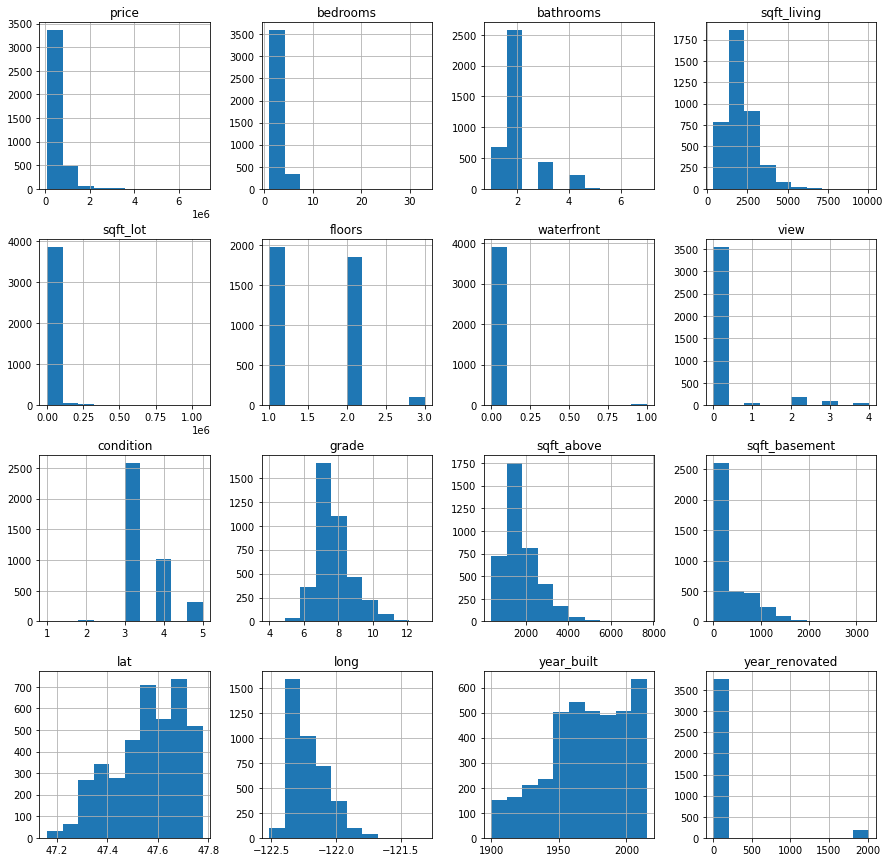

In [ ]:
# Plot histogram to show the value count per parameters
most_viewed.drop(columns=['id', 'zipcode', 'sqft_living15', 'sqft_lot15'], inplace=True)

most_viewed.hist(figsize = (15, 15));


In [ ]:
# Check the Skewness
for i, col_val in enumerate(df_1.columns):
  print(f"The skewness of {col_val} is: {df_1[col_val].skew()}")

The skewness of price is: 4.213091235320062
The skewness of bedrooms is: 6.559902415123225
The skewness of bathrooms is: 1.0958341431188514
The skewness of sqft_living is: 1.3729712768697127
The skewness of sqft_lot is: 12.632483147865116
The skewness of floors is: 0.38148604541105474
The skewness of view is: 3.3772728209038836
The skewness of condition is: 1.1261777433683444
The skewness of grade is: 0.8130382567550547
The skewness of sqft_above is: 1.3362610515790097
The skewness of sqft_basement is: 1.5342627671228124
The skewness of sqft_lot15 is: 9.099110692882453


In [ ]:
# Check the Kurtosis
for i, col_val in enumerate(df_1.columns):
  print(f"The kurtosis of {col_val} is: {df_1[col_val].kurt()}")

The kurtosis of price is: 40.47262204522551
The kurtosis of bedrooms is: 175.19024906449656
The kurtosis of bathrooms is: 2.490498701646483
The kurtosis of sqft_living is: 3.993680632887223
The kurtosis of sqft_lot is: 217.841430421497
The kurtosis of floors is: -0.9527116984344319
The kurtosis of view is: 10.776943408631283
The kurtosis of condition is: 0.456400254082745
The kurtosis of grade is: 1.083717791941055
The kurtosis of sqft_above is: 2.4561164258123904
The kurtosis of sqft_basement is: 2.1471556338125115
The kurtosis of sqft_lot15 is: 111.0164236575844


### 6.2 Bivariate Analysis

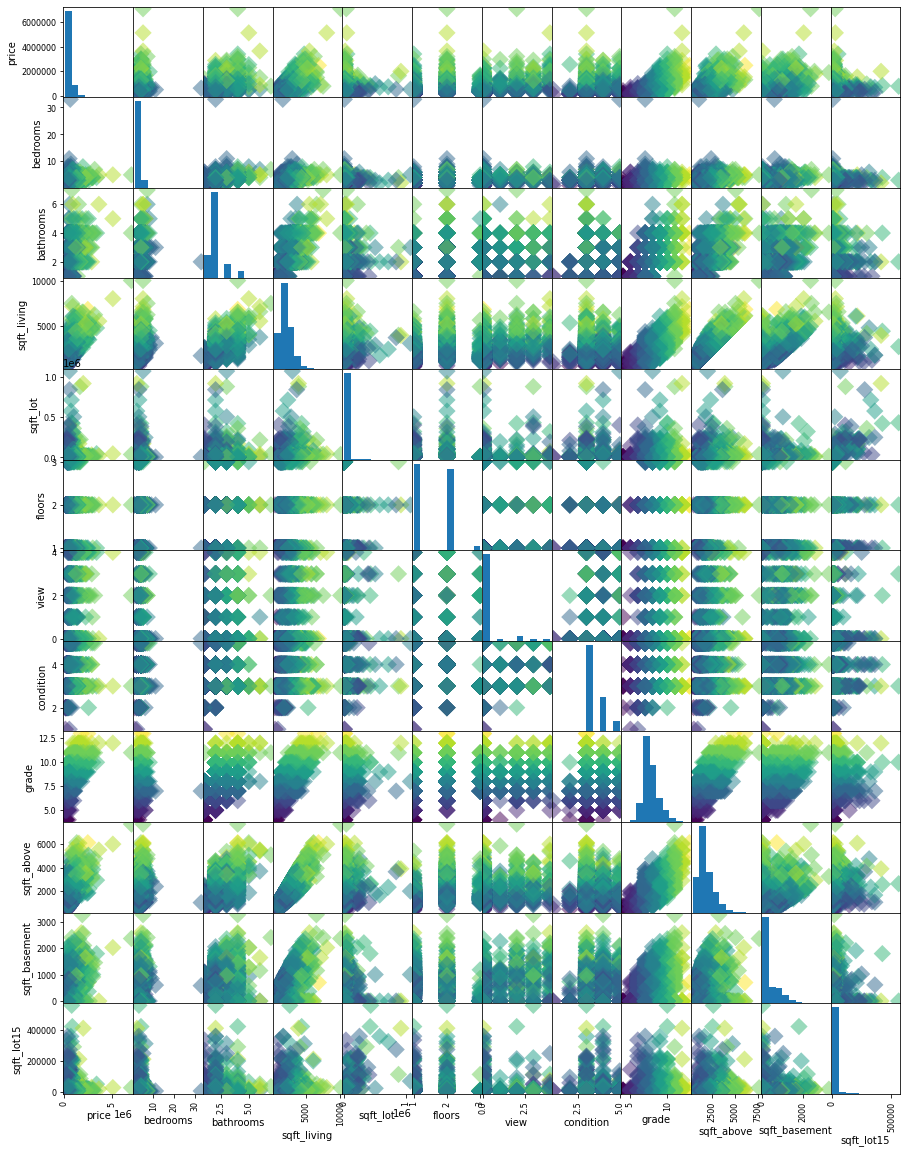

In [ ]:
# plot scatter matrix to display Bivariate Relationships between combination variables
y = df_1['grade']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

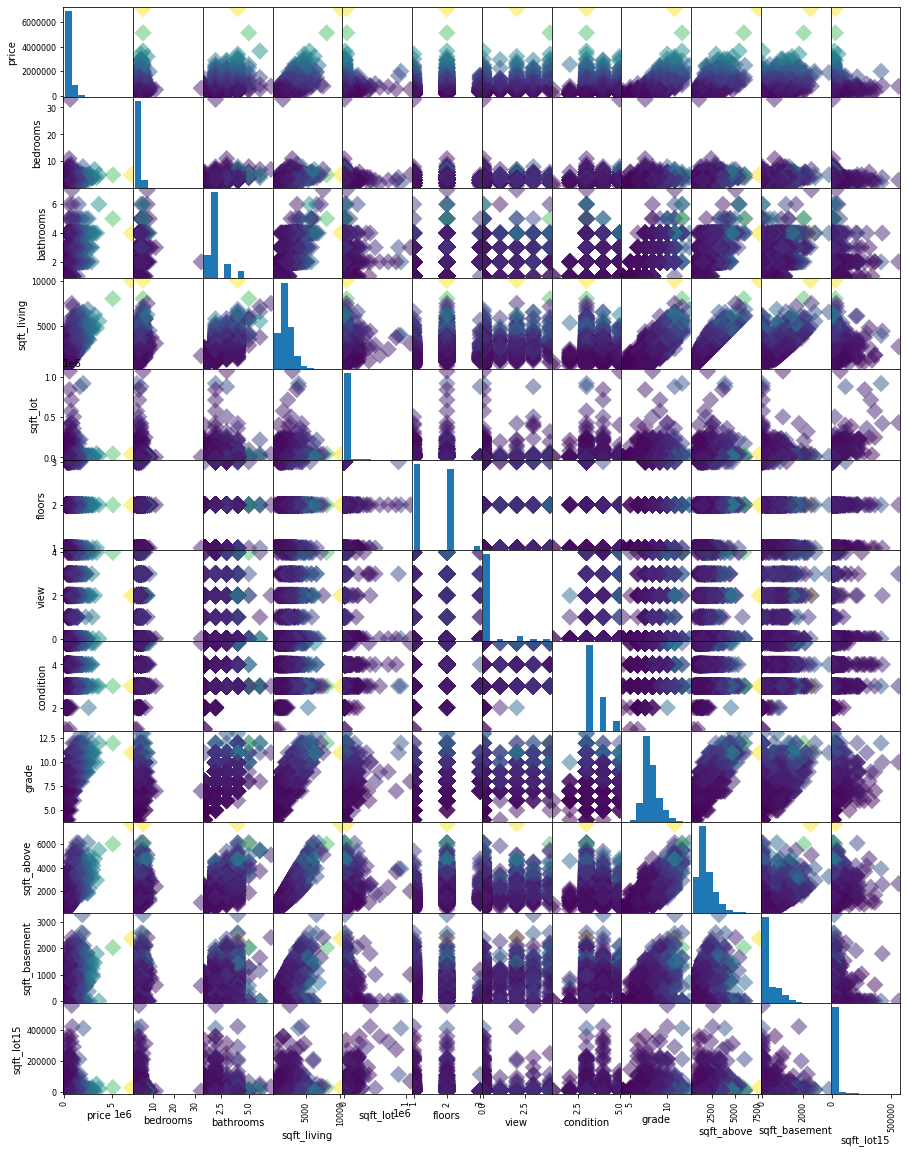

In [ ]:
y = df_1['price']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

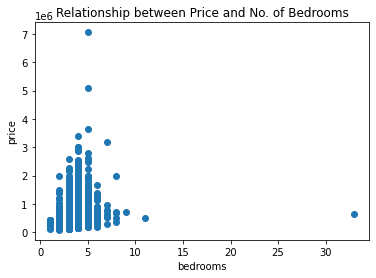

In [ ]:
# Scatter plot for price vs number of bedrooms
x = df_1['bedrooms']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title('Relationship between Price and No. of Bedrooms');

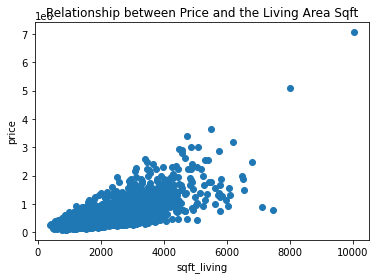

In [ ]:
# Scatter plot of price and the living area square feet.
x = df_1['sqft_living']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title('Relationship between Price and the Living Area Sqft');

There's a positive relationship between the price and the living area sqft. As the sqft increases, the price also increases.

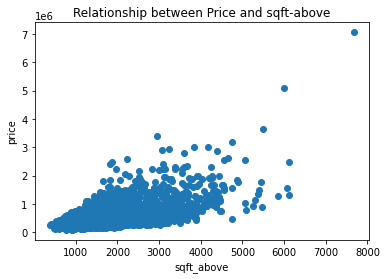

In [ ]:
# Scatter plot of sqft-above and price
x = df_1['sqft_above']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_above')
plt.ylabel("price")
plt.title("Relationship between Price and sqft-above");

There's a relationship between price and sqft above

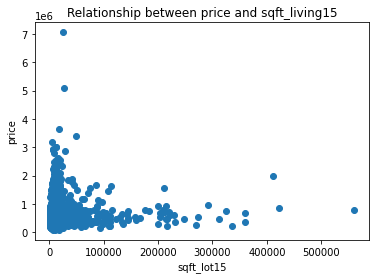

In [ ]:
x = df_1['sqft_lot15']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_lot15')
plt.ylabel("price")
plt.title("Relationship between price and sqft_living15");

In [ ]:
# Convert the date index to time series
# For time series, set the date column to be the index column
# Save the changes in a new dataframe
time_series_df = data.copy(deep=True)
time_series_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0
13238,685000.0,4,1.0,1550,15239,1.5,1,4,3,6,1370,180,98166,47.4502,-122.378,1790,22047,1930,0.0


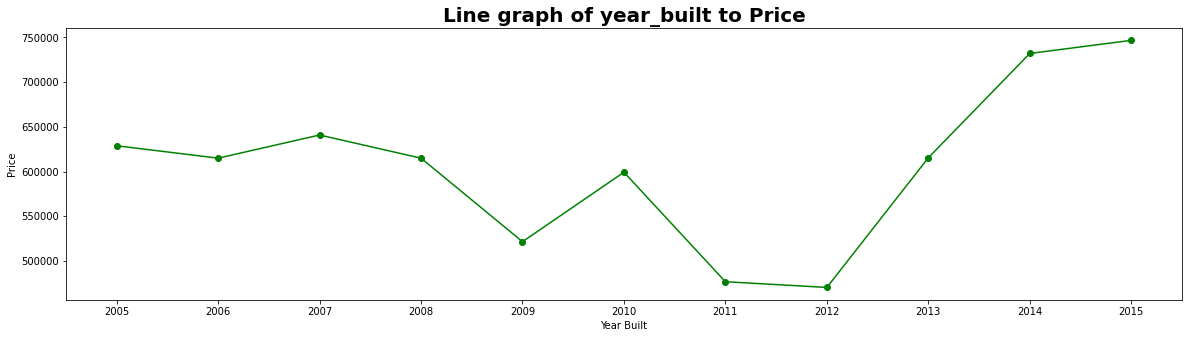

In [ ]:
# Line graph of how the price has fluctuated over time from the year the houses were
# built for the past 10 years (2005 to 2015)
yr_built = time_series_df[time_series_df["year_built"] >= 2005]
scatter =yr_built.groupby("year_built")['price'].mean().reset_index(name = 'avg_per_year')

x = scatter['year_built']
y= scatter['avg_per_year']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('Year Built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_built to Price', fontsize = 20,fontweight='bold');

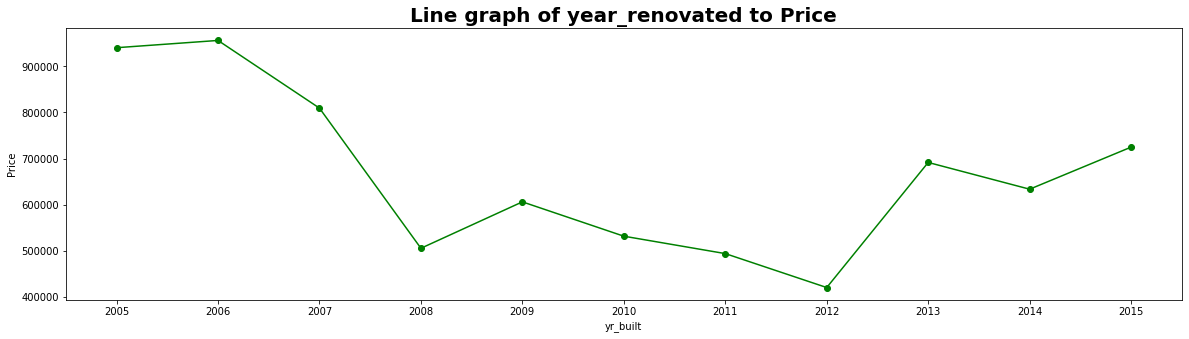

In [ ]:
# Line graph of how the price has fluctuated over time from the year the houses were
# renovated for the past 10 years (2005 to 2015)
yr_renovated = data[data["year_renovated"] >= 2005]
scatter =yr_renovated.groupby("year_renovated")['price'].mean().reset_index(name = 'avg_year_renovated')

x = scatter['year_renovated']
y= scatter['avg_year_renovated']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('yr_built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_renovated to Price', fontsize = 20,fontweight='bold');

In [ ]:
# make a copy of the dataset and create a new column for renovations
renov_df = data.copy(deep=True)

In [ ]:
#Since the year renovated had most 0 values, we will change the the zeros to reflect
# not renovated and 1 to reflect those houses that were renovated.
renov_df.loc[df['year_renovated']==0,'renovations']=0
renov_df.loc[df['year_renovated']>0,'renovations']=1
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0.0
13238,685000.0,4,1.0,1550,15239,1.5,1,4,3,6,1370,180,98166,47.4502,-122.378,1790,22047,1930,0.0,0.0


In [ ]:
# Convert float values of renovations to integer
renov_df['renovations'] = renov_df['renovations'].astype(int)
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0


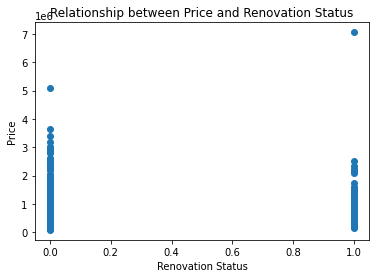

In [ ]:
# Relationship between price and renovated houses or not
x = renov_df['renovations']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Renovation Status')
plt.ylabel("Price")
plt.title("Relationship between Price and Renovation Status");

In [ ]:
# Create a new column for current date (27th July 2021)
renov_df['date'] = pd.to_datetime('today')
renov_df.head(1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0,2021-07-27 19:01:50.959197


In [ ]:
# Extract the year from current date
renov_df['current_year'] = renov_df['date'].dt.year
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0,2021-07-27 19:01:50.959197,2021
13238,685000.0,4,1.0,1550,15239,1.5,1,4,3,6,1370,180,98166,47.4502,-122.378,1790,22047,1930,0.0,0,2021-07-27 19:01:50.959197,2021


In [ ]:
# Establish the age of the house by subtracting the year built from current year
renov_df['house_age'] = renov_df['current_year'] - renov_df['year_built']
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year,house_age
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0,2021-07-27 19:01:50.959197,2021,18


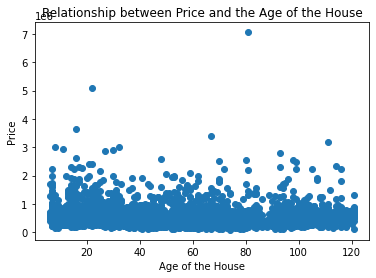

In [ ]:
# relationship between price and age of the house
x = renov_df['house_age']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Age of the House')
plt.ylabel("Price")
plt.title("Relationship between Price and the Age of the House");

#### Performing Discriminant Analysis

In [ ]:
# Preview the columns
renov_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations', 'date',
       'current_year', 'house_age'],
      dtype='object')

In [ ]:
# Drop the date and current year column
renov_lda_df = renov_df.copy(deep=True)
renov_lda_df.head(1)
renov_lda_df.drop(columns=['date', 'current_year'], inplace=True)
renov_lda_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0,18


In [ ]:
# Create features and labels
X = renov_lda_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
                  'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
                  'house_age']].values
y = renov_lda_df['price'].values

In [ ]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

8076210.917091425
[-2.35030251e+04  1.64364444e+04  1.10108264e+02  1.97009097e-01
  2.22590339e+04  7.88068497e+05  4.76466644e+04  3.91899642e+04
  9.72423739e+04  6.30909257e+01  4.70173415e+01 -6.55654278e+02
  6.32614004e+05 -2.26914894e+05  3.28433509e+01 -4.91097037e-01
 -1.22602762e+03  5.05264923e+03 -1.00351263e+07  1.22602762e+03]


In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame

,Actual,Predicted
0,491500.0,526296.538209
1,333000.0,316754.786983
2,255000.0,320550.508797
3,440000.0,317972.129277
4,645000.0,840304.439127
...,...,...
783,423500.0,589470.092166
784,425000.0,296076.527528
785,350000.0,811734.431078
786,308000.0,249999.010446


In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,7.880000e+02,7.880000e+02
mean,5.204918e+05,5.187837e+05
std,3.028335e+05,2.716170e+05
min,1.100000e+05,-1.491261e+05
25%,3.250000e+05,3.337122e+05
50%,4.585000e+05,4.776491e+05
75%,6.327500e+05,6.770197e+05
max,3.640000e+06,1.842037e+06


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 120120.64218869136
Mean Squared Error: 30465617159.16889
Root Mean Squared Error: 174544.02642075406


In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.017766497461928935


In [ ]:
## Hyperparameter Tuning using randon search
df_2 = renov_lda_df.copy(deep=True)
df_2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
570,338900.0,4,2.5,1830,5612,2.0,0,0,3,7,1830,0,98038,47.3572,-122.015,1830,5998,2003,0.0,0,18
13238,685000.0,4,1.0,1550,15239,1.5,1,4,3,6,1370,180,98166,47.4502,-122.378,1790,22047,1930,0.0,0,91


## 7. Implementing the Solution-Multiple Linear Regression

### 7.1 Polynomial Regression

> We'll first check the multicollinearity between the variables and drop those variables that seem to be correlated.





#### 7.1.1 Multicollinearity

#### Finding correlation between the independent variables

In [ ]:
df_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [ ]:
# Set price as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
prediction_df = df_2.drop(columns=['price'], inplace=True)
prediction_df = df_2.corr()
prediction_df 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
bedrooms,1.000000,0.462817,0.510821,0.018188,0.165967,-0.008140,0.083549,0.050535,0.295055,0.415781,0.275219,-0.126507,-0.010109,0.112742,0.321770,0.014251,0.126665,-0.006510,-0.006640,-0.126665
bathrooms,0.462817,1.000000,0.752272,0.076560,0.505981,0.060836,0.184866,-0.106304,0.652400,0.684661,0.271415,-0.193574,0.012452,0.241851,0.571550,0.066076,0.501946,0.020071,0.019635,-0.501946
sqft_living,0.510821,0.752272,1.000000,0.162805,0.377991,0.115469,0.304683,-0.049738,0.762786,0.872879,0.429719,-0.185491,0.046694,0.238888,0.754284,0.166491,0.322388,0.029435,0.029258,-0.322388
sqft_lot,0.018188,0.076560,0.162805,1.000000,0.000440,0.044883,0.072898,0.013321,0.137905,0.171294,0.015952,-0.112313,-0.088539,0.189459,0.125209,0.715031,0.050010,-0.006213,-0.006137,-0.050010
floors,0.165967,0.505981,0.377991,0.000440,1.000000,0.019636,0.027837,-0.266062,0.459332,0.551238,-0.247098,-0.059587,0.049706,0.144705,0.306590,-0.023264,0.477685,0.000893,0.000804,-0.477685
waterfront,-0.008140,0.060836,0.115469,0.044883,0.019636,1.000000,0.369242,0.004373,0.083161,0.076313,0.094916,0.018945,-0.004684,-0.044020,0.093140,0.029897,-0.036218,0.040152,0.040138,0.036218
view,0.083549,0.184866,0.304683,0.072898,0.027837,0.369242,1.000000,0.029948,0.273674,0.164051,0.319503,0.091792,0.008619,-0.091887,0.301697,0.067947,-0.055074,0.088579,0.088607,0.055074
condition,0.050535,-0.106304,-0.049738,0.013321,-0.266062,0.004373,0.029948,1.000000,-0.144205,-0.150733,0.177227,0.017540,-0.026675,-0.110051,-0.094887,0.014405,-0.350509,-0.056743,-0.056358,0.350509
grade,0.295055,0.652400,0.762786,0.137905,0.459332,0.083161,0.273674,-0.144205,1.000000,0.755790,0.161288,-0.165814,0.107448,0.204012,0.719752,0.139849,0.432567,0.006351,0.005980,-0.432567
sqft_above,0.415781,0.684661,0.872879,0.171294,0.551238,0.076313,0.164051,-0.150733,0.755790,1.000000,-0.065496,-0.246116,-0.000800,0.345309,0.724743,0.179483,0.430229,0.007893,0.007828,-0.430229


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using these correlations to compute the VIF score for each variable. But first we'll create a new dataframe with the inverse of the matrix above.

#### 7.1.2 Calculating the VIF Score for each independent variable

In [ ]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
bedrooms,1.481216,-0.389150,2.105686e-01,0.044959,0.028472,0.075549,0.062877,-0.052632,0.278918,-9.699905e-01,-5.252932e-01,0.076658,0.032443,0.005073,0.093215,0.056453,3.298613e-01,-0.685918,0.739970,1.799416e-01
bathrooms,-0.389150,3.230547,6.140005e-02,-0.005087,-0.650481,-0.008150,0.027303,-0.174371,-0.261469,-1.306742e+00,-1.068596e+00,-0.012218,-0.015663,-0.012021,0.078126,0.098715,-8.840655e-01,-11.751217,11.531751,4.368272e-02
sqft_living,0.203202,0.038747,-1.681685e+14,-0.156587,0.188036,-0.586384,1.543251,0.011533,-0.040286,1.521766e+14,8.223215e+13,0.074222,0.132103,-0.078059,-0.247926,-0.024990,2.008519e+13,-359.731381,359.644526,2.008519e+13
sqft_lot,0.044959,-0.005087,-1.588905e-01,2.072594,0.004434,-0.029011,-0.031309,0.001139,-0.093888,-2.396385e-02,2.175463e-02,0.005455,0.049157,-0.073446,0.171429,-1.444490,1.291323e-01,0.598213,-0.573514,6.061046e-02
floors,0.028472,-0.650481,2.020839e-01,0.004434,2.032809,-0.008528,-0.053469,0.126695,-0.182412,-7.574273e-01,5.008827e-01,-0.166244,-0.131986,0.171205,0.235288,0.128190,-3.283001e-01,4.073036,-4.143029,1.198405e-01
waterfront,0.075549,-0.008150,-5.879376e-01,-0.029011,-0.008528,1.168679,-0.442710,0.013093,0.075225,3.862508e-01,2.688297e-01,0.050137,-0.002248,0.034549,0.055499,0.018320,9.337344e-02,-0.966299,0.968284,6.125002e-02
view,0.062877,0.027303,1.555818e+00,-0.031309,-0.053469,-0.442710,1.448668,0.006404,-0.231863,-1.326606e+00,-1.073030e+00,-0.144211,0.128699,0.087354,-0.357367,-0.025486,-2.528539e-01,3.614779,-3.668766,-3.814709e-01
condition,-0.052632,-0.174371,1.441946e-02,0.001139,0.126695,0.013093,0.006404,1.241973,-0.021535,1.365673e-02,-9.855009e-02,0.119956,0.083283,-0.010530,0.056381,-0.020267,2.020773e-01,6.884353,-6.697576,-3.381937e-01
grade,0.278918,-0.261469,-1.339447e-02,-0.093888,-0.182412,0.075225,-0.231863,-0.021535,3.397724,-1.567144e+00,-4.190506e-01,0.053894,-0.336496,0.413181,-0.930531,-0.035498,-6.241599e-01,-10.775360,10.708602,-7.076429e-02
sqft_above,-0.937596,-1.318216,1.521766e+14,-0.027259,-0.746881,0.384251,-1.314338,0.018008,-1.545622,-1.377055e+14,-7.441233e+13,-0.100729,0.052720,-0.214881,-1.285773,-0.139757,-1.817520e+13,336.489968,-336.403297,-1.817520e+13


The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. In this case, with values around 1, we are in good shape, and can proceed with the regression. The VIF for sqft_living is 7.691731e+13, that of sqft_above is 6.261806e+13 and sqft_basement is 1.783867e+13. We will drop these variables because they are correlated.

Next we will create a model based on the set of independent variables above, then displaying the residual plot for it.

In [ ]:
# Check the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [ ]:
# Compute Correlation after dropping the correlated independent variables
prediction_df2 = df_2.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement', 'year_renovated'], inplace=True)
prediction_df2 = df_2.corr()
prediction_df2 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age
bedrooms,1.000000,0.462817,0.018188,0.165967,-0.008140,0.083549,0.050535,0.295055,-0.126507,-0.010109,0.112742,0.321770,0.014251,0.126665,-0.006640,-0.126665
bathrooms,0.462817,1.000000,0.076560,0.505981,0.060836,0.184866,-0.106304,0.652400,-0.193574,0.012452,0.241851,0.571550,0.066076,0.501946,0.019635,-0.501946
sqft_lot,0.018188,0.076560,1.000000,0.000440,0.044883,0.072898,0.013321,0.137905,-0.112313,-0.088539,0.189459,0.125209,0.715031,0.050010,-0.006137,-0.050010
floors,0.165967,0.505981,0.000440,1.000000,0.019636,0.027837,-0.266062,0.459332,-0.059587,0.049706,0.144705,0.306590,-0.023264,0.477685,0.000804,-0.477685
waterfront,-0.008140,0.060836,0.044883,0.019636,1.000000,0.369242,0.004373,0.083161,0.018945,-0.004684,-0.044020,0.093140,0.029897,-0.036218,0.040138,0.036218
view,0.083549,0.184866,0.072898,0.027837,0.369242,1.000000,0.029948,0.273674,0.091792,0.008619,-0.091887,0.301697,0.067947,-0.055074,0.088607,0.055074
condition,0.050535,-0.106304,0.013321,-0.266062,0.004373,0.029948,1.000000,-0.144205,0.017540,-0.026675,-0.110051,-0.094887,0.014405,-0.350509,-0.056358,0.350509
grade,0.295055,0.652400,0.137905,0.459332,0.083161,0.273674,-0.144205,1.000000,-0.165814,0.107448,0.204012,0.719752,0.139849,0.432567,0.005980,-0.432567
zipcode,-0.126507,-0.193574,-0.112313,-0.059587,0.018945,0.091792,0.017540,-0.165814,1.000000,0.272230,-0.565261,-0.267129,-0.137996,-0.365454,0.080626,0.365454
lat,-0.010109,0.012452,-0.088539,0.049706,-0.004684,0.008619,-0.026675,0.107448,0.272230,1.000000,-0.127647,0.042845,-0.099392,-0.166442,0.040582,0.166442


In [ ]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df2.values), index = prediction_df2.index, columns=prediction_df2.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age
bedrooms,1.334480,-0.685945,0.017060,0.037530,0.055373,0.031371,-0.061539,0.031244,0.067819,0.042665,-0.005373,-0.157662,0.033833,6.022075e-01,0.056819,3.902192e-01
bathrooms,-0.685945,2.559899,-0.054323,-0.467641,-0.038541,-0.096804,-0.206393,-0.689377,-0.034993,-0.024949,0.028778,-0.370271,0.065060,-1.085782e+00,-0.211260,-3.835841e-01
sqft_lot,0.017060,-0.054323,2.066546,-0.011125,-0.033967,-0.030839,0.001079,-0.148907,0.004237,0.054296,-0.081916,0.117545,-1.450064,2.096790e-01,0.024980,1.123561e-01
floors,0.037530,-0.467641,-0.011125,1.619834,-0.034936,0.107005,0.172289,-0.365822,-0.156579,-0.054572,0.017899,0.103800,0.099096,-2.406781e-01,-0.074945,2.201206e-01
waterfront,0.055373,-0.038541,-0.033967,-0.034936,1.163970,-0.436040,0.015406,0.027037,0.049369,0.004544,0.022857,0.011203,0.013157,2.419377e-02,0.002137,-2.936673e-02
view,0.031371,-0.096804,-0.030839,0.107005,-0.436040,1.379233,-0.015227,-0.204892,-0.148850,0.100184,0.143975,-0.354984,-0.018583,1.487723e-01,-0.051980,2.256356e-02
condition,-0.061539,-0.206393,0.001079,0.172289,0.015406,-0.015227,1.233179,-0.009636,0.119483,0.074394,0.005216,0.056863,-0.018256,5.830159e-01,0.186877,2.895371e-02
grade,0.031244,-0.689377,-0.148907,-0.365822,0.027037,-0.204892,-0.009636,2.875739,0.041707,-0.280095,0.322057,-1.424256,-0.088454,-8.103631e-01,-0.063464,-3.967157e-01
zipcode,0.067819,-0.034993,0.004237,-0.156579,0.049369,-0.148850,0.119483,0.041707,1.654640,-0.312460,0.736400,0.179488,-0.026322,-2.633048e-01,0.018833,-5.674350e-01
lat,0.042665,-0.024949,0.054296,-0.054572,0.004544,0.100184,0.074394,-0.280095,-0.312460,1.173056,-0.098780,-0.033981,0.073772,4.084391e-01,0.042806,8.800601e-02


In [ ]:
# The house age has a high correlation so we'll drop it
# Compute Correlation after dropping the correlated independent variables
prediction_df3 = df_2.drop(columns=['house_age'], inplace=True)
prediction_df3 = df_2.corr()
prediction_df3 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations
bedrooms,1.000000,0.462817,0.018188,0.165967,-0.008140,0.083549,0.050535,0.295055,-0.126507,-0.010109,0.112742,0.321770,0.014251,0.126665,-0.006640
bathrooms,0.462817,1.000000,0.076560,0.505981,0.060836,0.184866,-0.106304,0.652400,-0.193574,0.012452,0.241851,0.571550,0.066076,0.501946,0.019635
sqft_lot,0.018188,0.076560,1.000000,0.000440,0.044883,0.072898,0.013321,0.137905,-0.112313,-0.088539,0.189459,0.125209,0.715031,0.050010,-0.006137
floors,0.165967,0.505981,0.000440,1.000000,0.019636,0.027837,-0.266062,0.459332,-0.059587,0.049706,0.144705,0.306590,-0.023264,0.477685,0.000804
waterfront,-0.008140,0.060836,0.044883,0.019636,1.000000,0.369242,0.004373,0.083161,0.018945,-0.004684,-0.044020,0.093140,0.029897,-0.036218,0.040138
view,0.083549,0.184866,0.072898,0.027837,0.369242,1.000000,0.029948,0.273674,0.091792,0.008619,-0.091887,0.301697,0.067947,-0.055074,0.088607
condition,0.050535,-0.106304,0.013321,-0.266062,0.004373,0.029948,1.000000,-0.144205,0.017540,-0.026675,-0.110051,-0.094887,0.014405,-0.350509,-0.056358
grade,0.295055,0.652400,0.137905,0.459332,0.083161,0.273674,-0.144205,1.000000,-0.165814,0.107448,0.204012,0.719752,0.139849,0.432567,0.005980
zipcode,-0.126507,-0.193574,-0.112313,-0.059587,0.018945,0.091792,0.017540,-0.165814,1.000000,0.272230,-0.565261,-0.267129,-0.137996,-0.365454,0.080626
lat,-0.010109,0.012452,-0.088539,0.049706,-0.004684,0.008619,-0.026675,0.107448,0.272230,1.000000,-0.127647,0.042845,-0.099392,-0.166442,0.040582


In [ ]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df3.values), index = prediction_df3.index, columns=prediction_df3.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations
bedrooms,1.334480,-0.685945,0.017060,0.037530,0.055373,0.031371,-0.061539,0.031244,0.067819,0.042665,-0.005373,-0.157662,0.033833,0.224312,0.056819
bathrooms,-0.685945,2.559899,-0.054323,-0.467641,-0.038541,-0.096804,-0.206393,-0.689377,-0.034993,-0.024949,0.028778,-0.370271,0.065060,-0.708345,-0.211260
sqft_lot,0.017060,-0.054323,2.066546,-0.011125,-0.033967,-0.030839,0.001079,-0.148907,0.004237,0.054296,-0.081916,0.117545,-1.450064,0.093568,0.024980
floors,0.037530,-0.467641,-0.011125,1.619834,-0.034936,0.107005,0.172289,-0.365822,-0.156579,-0.054572,0.017899,0.103800,0.099096,-0.453283,-0.074945
waterfront,0.055373,-0.038541,-0.033967,-0.034936,1.163970,-0.436040,0.015406,0.027037,0.049369,0.004544,0.022857,0.011203,0.013157,0.047106,0.002137
view,0.031371,-0.096804,-0.030839,0.107005,-0.436040,1.379233,-0.015227,-0.204892,-0.148850,0.100184,0.143975,-0.354984,-0.018583,0.148161,-0.051980
condition,-0.061539,-0.206393,0.001079,0.172289,0.015406,-0.015227,1.233179,-0.009636,0.119483,0.074394,0.005216,0.056863,-0.018256,0.543588,0.186877
grade,0.031244,-0.689377,-0.148907,-0.365822,0.027037,-0.204892,-0.009636,2.875739,0.041707,-0.280095,0.322057,-1.424256,-0.088454,-0.427762,-0.063464
zipcode,0.067819,-0.034993,0.004237,-0.156579,0.049369,-0.148850,0.119483,0.041707,1.654640,-0.312460,0.736400,0.179488,-0.026322,0.273702,0.018833
lat,0.042665,-0.024949,0.054296,-0.054572,0.004544,0.100184,0.074394,-0.280095,-0.312460,1.173056,-0.098780,-0.033981,0.073772,0.324756,0.042806


After dropping the correlated variables, the VIF score of each independent variable is now at one. The year bult is the only variable with the VIF of 2. This shows that there's no multicorrelinearity between independent variables. We can now proceed with regression; model creation and displaying a residual plot for it.

#### 7.1.3 Building model

In [ ]:
prediction_df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'renovations'],
      dtype='object')

In [ ]:
## Preview the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'renovations'],
      dtype='object')

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [ ]:
# Import the polynomial features and the linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = df_2.values
y = renov_lda_df['price'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Fit polynomial Regression to the dataset with a degree of 2
polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 3
polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 4
polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 5
#polynomial_regression_5 = PolynomialFeatures(degree = 5) 
#X_polynomial_5 = polynomial_regression_5.fit_transform(X)

#pol_regression_5 = LinearRegression()
#pol_regression_5.fit(X_polynomial_5, y)

#y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [ ]:
# Calculating the Root Mean Squared Error
print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
#print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

The Root Mean Squared Error for the 2nd degree of freedom is: 142682.32736001306
The Root Mean Squared Error for the 3rd degree of freedom is: 132291.83719524066
The Root Mean Squared Error for the 4th  degree of freedom is: 115077.57397858349


#### 7.1.4 Cross Validating the model

In [ ]:
# import the Kfold
from sklearn.model_selection import KFold

# We will use the K-Fold cross validation with a value of k=10
folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # Assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

The number of folds used is: 10

Training model 1
Model 1 Root Mean Squared Error is: 151679.32520873586

Training model 2
Model 2 Root Mean Squared Error is: 179809.73500669657

Training model 3
Model 3 Root Mean Squared Error is: 221555.83204806276

Training model 4
Model 4 Root Mean Squared Error is: 210367.65221716976

Training model 5
Model 5 Root Mean Squared Error is: 177915.310246231

Training model 6
Model 6 Root Mean Squared Error is: 212703.53050240167

Training model 7
Model 7 Root Mean Squared Error is: 329987.2508233751

Training model 8
Model 8 Root Mean Squared Error is: 191357.12460211906

Training model 9
Model 9 Root Mean Squared Error is: 196202.89746043962

Training model 10
Model 10 Root Mean Squared Error is: 216286.9629208396


In [ ]:
# Model evaluation

base_model = metrics.mean_squared_error(y_test, y_pred)
 
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('\nRoot Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nThe R2 score is          : ', r2_score(y_test, y_pred))

Mean Squared Error       :  20358246540.86993

Root Mean Squared Error  :  142682.32736001306

The R2 score is          :  0.795049437969789


In [ ]:
# RMSES Average
print(f"The Average Value of the RMSES of the 10 folds is: {np.mean(RMSES)}")

The Average Value of the RMSES of the 10 folds is: 208786.5621036071


#### 7.1.5 Residual plots and heteroskedasticity testing

In [ ]:
# Residuals
residuals = np.subtract(y_pred_4, y_test)
pd.DataFrame(residuals).describe()

,0
count,1182.000000
mean,215.922169
std,115126.081410
min,-587176.126776
25%,-57771.232109
50%,4908.574381
75%,68006.200554
max,512638.582659


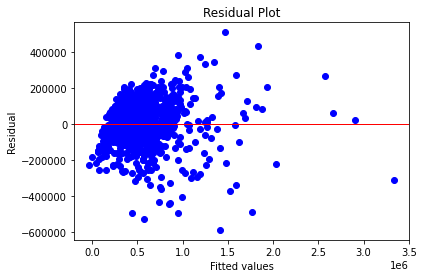

In [ ]:
# Residual plot for the Model 
plt.scatter(y_pred_4, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Residual mean
residuals.mean()

215.92216939490459

##### Computing the Critical Value 

In [ ]:
# Use bartlett's test. 
# The test establishes as a null hypothesis that the variance is equal for all datapoints
# and the Ha hypothesis that the variance is different for at least one pair of datapoints
import scipy.stats as stats
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_4)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous! The model is good for consideration")

Test result: 967.3136637988424
P-value: 2.2867324587870164e-212
The degree of freedom is: 1181
The probability value is: 1.0
The critical value is: inf
The variances are homogeneous! The model is good for consideration


Having homogeneous variances is a sufficient confirmation that we can be comfortable with the results for predicting variables for sales prices. 

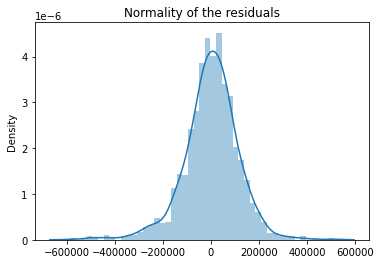

In [ ]:
#Distribution of error terms
residuals_plot = sns.distplot(residuals,kde=True)
residuals_plot = plt.title('Normality of the residuals');

### 7.2 Logistic regression model

##### Performing feature Engineering

In [ ]:
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'renovations'],
      dtype='object')

In [ ]:
# Previewing the dataset
logistic_df = df_2.copy(deep=True)
logistic_df.head(2)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations
570,4,2.5,5612,2.0,0,0,3,7,98038,47.3572,-122.015,1830,5998,2003,0
13238,4,1.0,15239,1.5,1,4,3,6,98166,47.4502,-122.378,1790,22047,1930,0


In [ ]:
# create feature and labels for the data
X=logistic_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'lat', 'long', 'year_built', 'renovations']]
y=df['price']

In [ ]:
# Fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [ ]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 8. Challenging the solution

### 8.1 Quantile Regression

When to use quantile Regression:
1. To estimate the median, or the 0.25 quantile, or any quantile 
2. Key assumption of linear regression is not satisfied
3. When they are Outliers in the data
4. residuals are not normal 
5. Increase in error variance with increase in outcome variable

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [339]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
df_copy = df_1.copy(deep=True)

X = df_copy.drop(['price'], axis=1)
y = df_copy.price

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)


# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ view + condition + grade + sqft_above + sqft_basement + year_built + year_renovated + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.5)

# Print the summary of the model
#
print(res.summary())
# The intercept is 9.09e+05 
# These are the parameters for the 0.5th quantile for y.

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3612
Model:                       QuantReg   Bandwidth:                   4.607e+04
Method:                 Least Squares   Sparsity:                    3.618e+05
Date:                Tue, 27 Jul 2021   No. Observations:                 3939
Time:                        21:27:14   Df Residuals:                     3929
                                        Df Model:                            9
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        9.09e+05   2.45e+05      3.706      0.000    4.28e+05    1.39e+06
view            6.358e+04   4192.965     15.163      0.000    5.54e+04    7.18e+04
condition       4.492e+04   4887.257      9.191      0.000    3.53e+04    5.45e+04
grade           1.165e+05   4278

In [361]:
# plotting Models for other Quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['grade'], res.params['condition'], res.params['view']] 
               + [res.conf_int().loc['grade'].tolist(), res.conf_int().loc['condition'].tolist(), res.conf_int().loc['view'].tolist()])

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound', 'view_bound'])
params

,qt,intercept,grade_coef,condition_coef,view_coef,condition_bound,grade_bound,view_bound
0,0.1,1.885422e+06,66507.580638,7469.400489,32483.377553,"[59966.95479675431, 73048.20647923762]","[-902.0491816693702, 15840.85015941004]","[25825.41795365451, 39141.3371526078]"
1,0.2,1.678093e+06,92329.230082,16454.166183,34748.500079,"[85006.39587645736, 99652.06428823862]","[7102.970589799641, 25805.36177581286]","[26925.03399760373, 42571.96616013624]"
2,0.3,5.438557e+05,102412.252099,31119.522653,42661.695145,"[94379.65377009059, 110444.85042726104]","[21400.617996723722, 40838.42730963662]","[34225.93145091939, 51097.45883978796]"
3,0.4,3.998272e+06,117519.643241,15842.795935,43365.071240,"[109712.91805244962, 125326.36843003074]","[6759.8828392309515, 24925.709029852747]","[35591.95111441042, 51138.1913649441]"
4,0.5,9.089840e+05,116450.081628,44919.527090,63577.155094,"[108061.28944772691, 124838.87380866171]","[35337.72753035407, 54501.326649487935]","[55356.56196327072, 71797.74822402948]"
5,0.6,2.489614e+06,121230.334307,35935.534233,67022.597390,"[112750.40232206744, 129710.26629278748]","[26404.377639974628, 45466.69082521724]","[58886.78917273362, 75158.40560792462]"
6,0.7,3.749619e+06,132424.263703,27087.428001,65333.850632,"[122676.74911454778, 142171.77829216892]","[16307.781108046212, 37867.07489336617]","[56026.6975560276, 74641.00370741644]"
7,0.8,3.996633e+06,139944.499324,36918.336512,106943.974524,"[128094.99614690457, 151794.00250028816]","[24068.74288002299, 49767.93014361742]","[96256.88306158203, 117631.06598635596]"
8,0.9,4.615257e+06,142036.735665,33664.715584,182236.991090,"[127934.66039040626, 156138.8109399794]","[18572.369922508096, 48757.06124483507]","[170721.5642405, 193752.4179396409]"


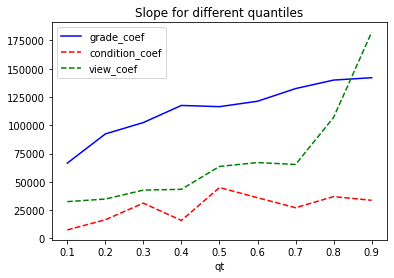

In [372]:
# Plot the changes in the quantile coeffiecients
params.plot(x = 'qt', y = ['grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound'],
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()


### 8.2 Ridge Regression

In [ ]:
#Defining the dependent and indepedent variables
X = df_copy.iloc[:,2:-1]
y = df_copy.iloc[:, 1]

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)

# Import Ridge and GridSerachcv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Grid Search
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-2,100,100)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

#Fit the mosel to the data
search.fit(X_train,y_train,)

#The best alpha forour model given the range we set in the grid search
search.best_params_

#The best Mean squared error we can expect to get from the ridge model
ridge_mse = abs(search.best_score_)
print(ridge_mse)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

0.7983689368337628

The ridge model produced a lower mean squared error.
Therefore this model is better compaired to the linear model.


In [ ]:
#The Test Model
# Fit the model with the best parameters from the grid search
# Calculate the mean squared error.

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
test_model = (mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))
print(test_model)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

0.48278329537513714

The ridge model produced a lower mean squared error.
Therefore this model is better compaired to the linear model.

The R2 score for the ridge model : 0.3837440784707783
The model is  38.374407847077826 % accurate


In [ ]:
# Determine the coefficients of these models by using for loop to go through 
# the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

{'bathrooms': -1852.2125406164337,
 'condition': 48912.05266210575,
 'floors': 27016.77685155448,
 'grade': 38613.90661620768,
 'sqft_above': 136235.325598405,
 'sqft_basement': -542.8564734988381,
 'sqft_living': 85910.1157108882,
 'sqft_lot': 0.21163190373044927,
 'view': 909813.6768431548}

In [ ]:
#Checking the Ridge coefficients
print('Ridge coefficients')
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline

Ridge coefficients


{'bathrooms': 0.43268262003917723,
 'condition': 0.013719237403515008,
 'floors': -0.002678039264106814,
 'grade': -0.016775999994822245,
 'sqft_above': -0.025082415857026006,
 'sqft_living': -0.025907568440563526,
 'sqft_lot': -0.017363545106995792,
 'view': -0.011606597872976594}

#### 8.3 Lasso Regression

The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
# Check the column names
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [ ]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [ ]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Standadising my datasetset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
y_pred = gridlasso.predict(x_test)

In [ ]:
# getting rmse and r2 score
r2 = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",r2)

The RMSE for the lasso model: 194056.93003710557
The R2 score for the lasso model is: 0.5888483243214093


In [ ]:
#checking the model accuracy using R2 score
accuracy1 = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy1} % accurate")

The model is 58.88483243214093 % accurate


#### 8.4 Elastic Net Regression

In [ ]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [ ]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalizing the data and creating our grid.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#fitting the model into the elastic regression
search.fit(x_train, y_train)
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.8}

In [ ]:
#fitting the model 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(x_train,y_train)

# Making the predictions
y_pred = elastic.predict(x_test)
r2 = r2_score(y_test, y_pred)

#getting the rmse and the r2
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the Elastic model is:",r2)

The RMSE for the Elastic model: 193922.83829085567
The R2 score for the Elastic model is: 0.589416332877033


In [ ]:
#checking the model accuracy using R2 score
accuracy = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy} % accurate")

The model is 58.9416332877033 % accurate


### 9.0 Conclusion


R-squared shows how well the regression model fits the observed data. The Elastic Model had an r-squared of 58.94%,  Lasso Regression had an r-squared of 58.88%, Ridge with an r2 of 38.37% and quantile regression with an r2 of 56.58%. Amongst the four regression model, elastic model revealed a better fit for the model having the highest R2 score of 58.94%.

#### 9.1 Did we have the right data:
Somehow yes we did have the right data. The only challenge was that the data would have captured the original price and the current valuation price for proper price predictions.

#### 9.2 Challenging the Solution
We may need to use other types of models such us Random Forest etc in-oder to increase the accuracy of the data.